In [1]:
import time

import pandas as pd
import numpy as np
import random
from tqdm import tqdm

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# 自作関数
from dataload.data_load import data_load
from func.my_func import *

In [2]:
INPUT_DIR = '../data/'

df = pd.read_csv(INPUT_DIR + 'answer_target_1505.csv')
X = df.drop([
    'TargetDate',
    'y',
    'mean'
    ], axis=1)
y = df['y'].fillna(0)
X

,StepSum,LowActivityHours,MaxValue,MinValue,RestValue,DiffRestValue,WakedUpValue,DiffWakedUpValue,SleepQuality,SleepHours,LightSleepHours,DeepSleepHours,SleepWakeCount
0,10396,4.3,144,50,76,6.5,62.00,-3.80,3.00,6.000,2.9000,3.00,1.000
1,21649,2.1,105,47,70,-0.8,65.00,-0.60,3.00,6.100,3.3000,2.70,1.000
2,10871,2.5,126,59,71,0.4,59.00,-5.50,3.15,6.695,3.7875,2.84,0.425
3,19380,4.5,159,55,75,4.4,63.85,0.24,3.15,6.695,3.7875,2.84,0.425
4,3188,1.0,107,64,75,2.5,63.85,0.24,3.00,5.100,2.8000,2.30,0.000
5,17520,7.9,141,53,72,-0.8,63.00,-1.30,4.00,6.200,2.6000,3.50,0.000
6,8896,7.9,163,48,61,-11.6,68.00,3.20,4.00,6.700,3.0000,3.60,0.000
7,8045,1.5,123,59,78,6.2,81.00,16.20,4.00,7.800,4.0000,3.80,0.000
8,9902,6.5,160,58,61,-11.3,67.00,2.00,4.00,7.200,3.8000,3.30,1.000
9,20323,6.4,120,51,72,1.5,53.00,-10.80,4.00,6.000,2.6000,3.30,0.000


In [3]:
y.mean()

0.14285714285714285

In [4]:
n_experiment = 10
ex_name = '0613'
data = 'id1505'

c:\Users\baseb\Documents\github\修論\SMOTEMTSBag\MTSBag\code\func\my_func.py:574: RuntimeWarning: divide by zero encountered in double_scalars
  result_df['RS'][m] = (TP / (TP + FN)) / (TN / (TN + FP))


AUC                 0.5
accuracy           0.65
recall           0.8125
Specificity         0.0
precision      0.764706
gmeans              0.0
RS                  inf
Name: 0, dtype: object

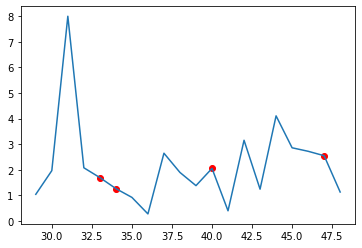

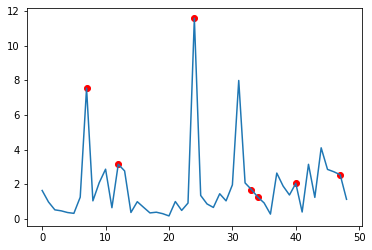

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する．
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

result_scaler, result_inv_C, select_columns = fit_MTS(X_train, y_train)

y_train_pred = predict_MD(X_train, result_scaler, result_inv_C, select_columns)

threshold = determine_threshold(y_train, y_train_pred)

y_proba = predict_MD(X_test, result_scaler, result_inv_C, select_columns)
y_pred = y_proba > threshold

result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
sns.lineplot(x=X.index, y=predict_MD(X, result_scaler, result_inv_C, select_columns))
plt.scatter(x=y[y == 1].index, y=predict_MD(X, result_scaler, result_inv_C, select_columns)[y == 1], c='r')
plt.show()

c:\Users\baseb\Documents\github\修論\SMOTEMTSBag\MTSBag\code\func\my_func.py:574: RuntimeWarning: divide by zero encountered in double_scalars
  result_df['RS'][m] = (TP / (TP + FN)) / (TN / (TN + FP))


AUC            0.515625
accuracy            0.8
recall              1.0
Specificity         0.0
precision           0.8
gmeans              0.0
RS                  inf
Name: 0, dtype: object

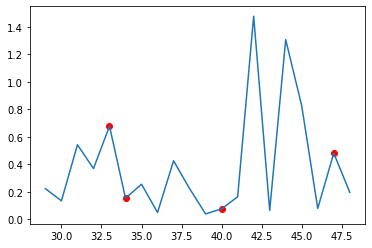

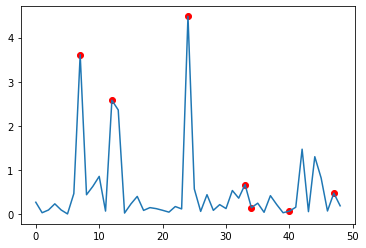

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight = fit_WMTGS(X_train, y_train)
y_train_pred = cal_gram_WMD_by_reduced_model(X_train, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight)

threshold = determine_threshold(y_train, y_train_pred)

y_proba, y_pred = predict_WMTGS(X_test, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)


result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
all_pred, _ = predict_WMTGS(X, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()

C:\Users\baseb\anaconda3\envs\convenient\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baseb\Documents\github\修論\SMOTEMTSBag\MTSBag\code\func\my_func.py:574: RuntimeWarning: divide by zero encountered in double_scalars
  result_df['RS'][m] = (TP / (TP + FN)) / (TN / (TN + FP))


AUC             0.21875
accuracy           0.75
recall           0.9375
Specificity         0.0
precision      0.789474
gmeans              0.0
RS                  inf
Name: 0, dtype: object

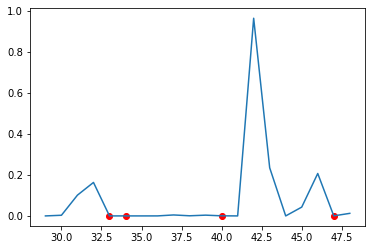

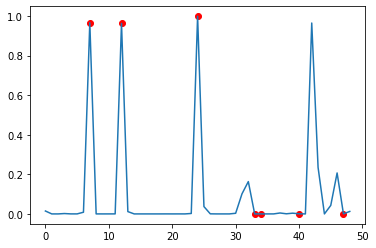

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]
result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()

all_pred = lr.predict_proba(X)[:, 1]

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()

In [8]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

c:\Users\baseb\Documents\github\修論\SMOTEMTSBag\MTSBag\code\func\my_func.py:574: RuntimeWarning: divide by zero encountered in double_scalars
  result_df['RS'][m] = (TP / (TP + FN)) / (TN / (TN + FP))


AUC            0.296875
accuracy            0.7
recall            0.875
Specificity         0.0
precision      0.777778
gmeans              0.0
RS                  inf
Name: 0, dtype: object

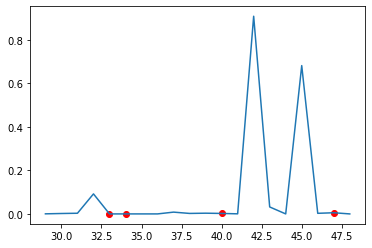

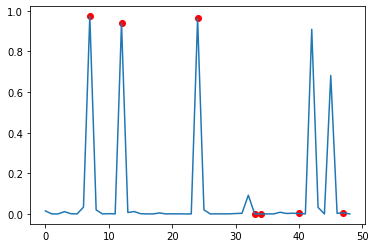

In [13]:
import lightgbm
lr = lightgbm.LGBMClassifier(min_child_samples=10) # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]
result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()

all_pred = lr.predict_proba(X)[:, 1]

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()